In [1]:
# Operator Learning via Kernel Methods
#
# This is mostly a script for prototyping methods

In [17]:
# Imports
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
import sys
sys.path.append('./')
from KLearn import *
from functools import reduce
import matplotlib.pyplot as plt

import jax
# from jax import grad

In [18]:
# Define some Kernels
gamma = 0.1;
K = lambda y1,y2 : rbf_kernel(y1,y2, gamma = gamma)
S = lambda x1,x2 : (x1.T @ x2 + 1)**2 # lame, for now

In [19]:
def comp_fxn(*fxn): 
      
    def comp(f, g): 
        return lambda x : f(g(x)) 
              
    return reduce(comp, fxn, lambda x : x) 

In [20]:
# define some functions and their derivatives


f1 = lambda x : x;
#df1 = jax.grad(f1)
df1 = lambda x : np.ones(np.shape(x));

f2 = lambda x : x**2;
df2 = lambda x : 2*x;

f3 = lambda x : np.sin(x);
df3 = lambda x : np.cos(x);

f4 = lambda x : np.exp(-x**2);
df4 = lambda x : -2*x*np.exp(-x**2);


In [21]:
# define functions and their laplacians
d2f1 = lambda x : np.zeros(np.shape(x));

d2f2 = lambda x : 2*np.ones(np.shape(x));

d2f3 = lambda x : -np.sin(x);

d2f4 = lambda x : 2*(2*x**2 - 1) * np.exp(-x**2);

In [22]:
# define functions and their squares
def op_square(x):
    return x**2

fs1 = comp_fxn(op_square, f1);
fs2 = comp_fxn(op_square, f2);
fs3 = comp_fxn(op_square, f3);
fs4 = comp_fxn(op_square, f4);

In [ ]:
# Integral operators; avoid higher than order 2 for derivatives because of the additional noise that will appear from the ill-posedness of differentiation; FOCUS ON SMOOTHING FUNCTIONS like convolution integral; solution to the heat equation

In [23]:
# define the sine composition of the original functions
def op_sin(x):
    return np.sin(x)

fsin1 = comp_fxn(op_sin, f1);
fsin2 = comp_fxn(op_sin, f2);
fsin3 = comp_fxn(op_sin, f3);
fsin4 = comp_fxn(op_sin, f4);

In [24]:
# Define phi, psi, and the collocation points
n = 100;
xphi = d2(np.linspace(0,1,num=n)).T;
phi = lambda f : d2(f(xphi));

m = 75;
ypsi = d2(np.linspace(0,1,num=m)).T;
psi = lambda f : d2(f(ypsi));

In [25]:
# Test it out
#phi(f1)

In [26]:
# Finish setting up
U = np.hstack( (phi(f1), phi(f2), phi(f3), phi(f4)) ); 
V = np.hstack( (psi(df1), psi(df2), psi(df3), psi(df4)) );
print(np.shape(U))
Y = ypsi;

(100, 4)


In [27]:
# LEARN!
D = KLearn(U,V,m,S,K,Y)

In [28]:
# Does it work... ?
fSin1 = D(phi(f1));
np.max(np.abs(fSin1(ypsi) - fsin1(ypsi))) # very nice...

0.9999949519054792

In [29]:
fSin1(0)

array([[0.99999495]])

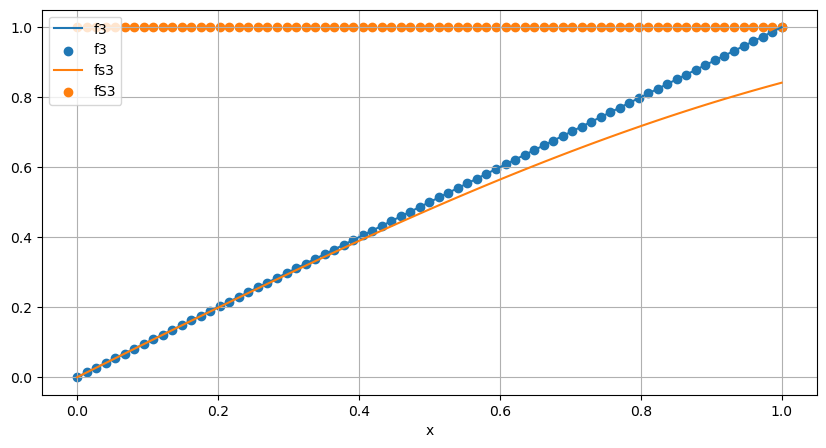

In [30]:
plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(ypsi,f1(ypsi), label="f3") # scatter plot of the data
plt.scatter(ypsi,f1(ypsi), label="f3") # scatter plot of the data
plt.plot(ypsi,fsin1(ypsi), label="fs3")
plt.scatter(ypsi,fSin1(ypsi), label = "fS3")
plt.legend(loc="upper left")
plt.xlabel('x')  # x-axis label
plt.grid()
# plt.savefig('OpL_plot.png', dpi = 600, bbox_inches = 'tight')